Requests for Data

In [1]:
# System
import os
import glob as glob


# Basic Function
import pandas as pd
import numpy as np

# Visuals
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns


### Statistics Packages ###

from statsmodels.stats.outliers_influence import variance_inflation_factor #VIF

# Requisite Functionality 
from sklearn.model_selection import train_test_split
import statsmodels.api

# Linear Regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression

# Time Series
import statsmodels.tsa as tsa
from statsmodels.graphics.tsaplots import month_plot





#Location (GPS,GIS,GDF)
import geopandas as gpd
from shapely.geometry import Point # for gpd/GIS
###import requests


pd.set_option('display.max_columns', None)

In [ ]:
os.chdir('.\\2024 Hillsborough Shape Files')

In [ ]:
os.listdir()

In [272]:
coastal_permits=pd.read_csv('Coastal_Permit_Activities.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Coastal_Permit_Activities.csv'

In [ ]:
coastal_permits.head()

In [ ]:
coastal_permits.info()

In [ ]:
coastal_permits.LATITUDE

In [ ]:
gdf = gpd.GeoDataFrame(coastal_permits, geometry=gpd.points_from_xy(coastal_permits['longitude'], coastal_permits['latitude']))

In [ ]:
gdf.describe

In [ ]:
gdf.plot()

In [ ]:
coastal_permits

In [ ]:
gdf_shp=gpd.read_file('2024_10_parcels.shp')

In [ ]:
gdf_shp.head()

In [ ]:
gdf_shp.plot()

In [ ]:
coastal_permits_gdf = gpd.GeoDataFrame(coastal_permits, geometry=gpd.points_from_xy(coastal_permits['longitude'], coastal_permits['latitude']))

In [ ]:
gdf.plot(column='population', cmap='YlOrRd', legend=True, figsize=(20, 20))

In [ ]:
coastal_permits_gdf.head()

In [ ]:
coastal_permits_gdf.head(1)

In [ ]:
gdf_shp

In [ ]:
import geopandas as gpd
import pandas as pd

def extract_coordinates(gdf):
  """Extracts latitude and longitude from a GeoDataFrame with polygons and multipolygons"""

  coordinates = []
  for index, row in gdf.iterrows():
    geom = row['geometry']
    if geom.type == 'Polygon':
      for coord in geom.exterior.coords:
        coordinates.append(coord)
    elif geom.type == 'MultiPolygon':
      for polygon in geom:
        for coord in polygon.exterior.coords:
          coordinates.append(coord)
    else:
      print(f"Unsupported geometry type: {geom.type}")
  return coordinates

# Assuming 'gdf' is your GeoDataFrame
all_coordinates = extract_coordinates(gdf_shp)

# Create a Pandas DataFrame from the extracted coordinates
df = pd.DataFrame(all_coordinates, columns=['longitude', 'latitude'])

print(df.head())

In [ ]:
def extract_coordinates(gdf_shp):
  """Extracts latitude and longitude from a GeoDataFrame with MultiPolygon geometries"""

  coordinates = []
  for index, row in gdf_shp.iterrows():
    for polygon in row['geometry']:
      for coord in polygon.exterior.coords:
        coordinates.append(coord)
  return coordinates

all_coordinates = extract_coordinates(gdf)

In [ ]:
coastal_permits_gdf

In [ ]:
X=gdf_shp.geometry.to_crs(4326)

In [ ]:
coastal_permits.head(10)

In [ ]:
X

In [ ]:
coastal_permits_gdf.head(1)

## gdf_shp.head(1)

In [ ]:
gdf_shp.geometry.crs

In [ ]:
coastal_permits_gdf.geometry

In [ ]:
gdf_shp.geometry

In [ ]:
gdf_melt=pd.melt(gdf_shp)

In [ ]:
gdf_geo=gdf_melt[gdf_melt['variable']=='geometry']

In [ ]:
gdf_shp.index

In [ ]:
coastal_permits_gdf

In [ ]:
pl
pd.concat([gdf_shp.geometry,coastal_permits_gdf.geometry]).plot()
plt.show

In [ ]:
coastal_permits_gdf.info()

In [ ]:
gdf.to_file('coastal_permits_gdf', driver='GeoJSON')  

In [ ]:
coastal_permits_gdf.to_file('./' ,driver='JSON')

In [ ]:
pwd

In [ ]:
coastal_permits_gdf.geometry=coastal_permits_gdf.geometry.set_crs(4326)

In [ ]:
coastal_permits_gdf.to_file('.\\test',driver='GeoJSON')

In [240]:
gdf_shp.to_csv('hc_shp.csv')

In [ ]:
gdf_shp.Edit_dt=pd.to_datetime(gdf_shp.Edit_dt)

In [29]:
gdf_shp

NameError: name 'gdf_shp' is not defined

In [237]:
gdf_shp.columns = gdf_shp.columns.str.lower()

In [243]:
coastal_permits_gdf

x              y  objectid  file_id county prmt_typ  \
0       228249.499782  685295.191479         1     7509     BA     CCCL   
1       230679.030418  683254.001625         2     7510     BA     CCCL   
2       230679.030418  683254.001625         3     7510     BA     CCCL   
3       230679.030418  683254.001625         4     7510     BA     CCCL   
4       264531.549199  659904.150665         5     7511     BA     CCCL   
...               ...            ...       ...      ...    ...      ...   
140507  694779.967651  574756.075031    140508    74505     VO      JCP   
140508  192039.484951  704193.259883    140509    17999     WL      JCP   
140509  206642.925780  698113.108983    140510    42215     WL      JCP   
140510  207219.309346  697869.387843    140511    42215     WL      JCP   
140511  191141.603646  704509.100980    140512    42729     WL      JCP   

              prmt_num  status  des_code  \
0             BA000001  Closed        64   
1             BA000002  Closed        34   
2             BA000002  Closed        64   
3             BA000002  Closed        82   
4             BA000003  Closed         1   
...                ...     ...       ...   
140507  0312780-002-JC  Issued         3   
140508  0127254-001-JC  Closed        85   
140509  0202472-002-JC  Issued        23   
140510  0202472-002-JC  Issued        23   
140511  0225586-001-JC  Issued        85   

                                                 descript  rng_from    rng_to  \
0       Decks, Porches, and Balconies attached to Majo...  BA R-075       NaN   
1                                                    Fill  BA R-085       NaN   
2       Decks, Porches, and Balconies attached to Majo...  BA R-085       NaN   
3                      Walkways, Boardwalks And/Or Stairs  BA R-085       NaN   
4                                  Single Family Dwelling  BA R-136       NaN   
...                                                   ...       ...       ...   
140507  Public or Commercial (Hotel, Restaurant, Offic...  VO R-118       NaN   
140508                                         Excavation  WL R-072       NaN   
140509                                              Groin  WL R-122  WL R-124   
140510                                              Groin  WL R-122  WL R-124   
140511                                         Excavation  WL R-069       NaN   

        datum sp_zone        east       north   latitude  longitude  \
0       NAD83   NORTH  1562322.10   425493.54  30.163698  85.785326   
1       NAD83   NORTH  1570324.50   418831.05  30.145625  85.759772   
2       NAD83   NORTH  1570324.50   418831.05  30.145625  85.759772   
3       NAD83   NORTH  1570324.50   418831.05  30.145625  85.759772   
4       NAD83   NORTH  1681792.56   342700.04  29.939205  85.405208   
...       ...     ...         ...         ...        ...        ...   
140507  NAD83    EAST   667502.13  1749590.16  29.146581  80.964489   
140508  NAD83   NORTH  1443192.16   487054.68  30.328717  86.165103   
140509  NAD83   NORTH  1491217.79   467273.27  30.276171  86.012060   
140510  NAD83   NORTH  1493113.48   466480.40  30.274060  86.006022   
140511  NAD83   NORTH  1440240.03   488081.08  30.331420  86.174507   

            ver_stat  iss_date    exp_date                       own_last  \
0       NOT REVIEWED  19810424  19820424.0  Horaitis, Kostas and Maria K.   
1       NOT REVIEWED  19800313  19810913.0                            NaN   
2       NOT REVIEWED  19800313  19810913.0                            NaN   
3       NOT REVIEWED  19800313  19810913.0                            NaN   
4       NOT REVIEWED  19800723  19820123.0                  Kohler, Keith   
...              ...       ...         ...                            ...   
140507      REVIEWED  20151124  20201124.0            Barshay, Raymond E.   
140508  NOT REVIEWED  19970818  19980430.0               Butler, Van Ness   
140509      REVIEWED  20040525  20090525.0                Pickel, Bradl

In [250]:
coastal_permits_gdf

x              y  objectid  file_id county prmt_typ  \
0       228249.499782  685295.191479         1     7509     BA     CCCL   
1       230679.030418  683254.001625         2     7510     BA     CCCL   
2       230679.030418  683254.001625         3     7510     BA     CCCL   
3       230679.030418  683254.001625         4     7510     BA     CCCL   
4       264531.549199  659904.150665         5     7511     BA     CCCL   
...               ...            ...       ...      ...    ...      ...   
140507  694779.967651  574756.075031    140508    74505     VO      JCP   
140508  192039.484951  704193.259883    140509    17999     WL      JCP   
140509  206642.925780  698113.108983    140510    42215     WL      JCP   
140510  207219.309346  697869.387843    140511    42215     WL      JCP   
140511  191141.603646  704509.100980    140512    42729     WL      JCP   

              prmt_num  status  des_code  \
0             BA000001  Closed        64   
1             BA000002  Closed        34   
2             BA000002  Closed        64   
3             BA000002  Closed        82   
4             BA000003  Closed         1   
...                ...     ...       ...   
140507  0312780-002-JC  Issued         3   
140508  0127254-001-JC  Closed        85   
140509  0202472-002-JC  Issued        23   
140510  0202472-002-JC  Issued        23   
140511  0225586-001-JC  Issued        85   

                                                 descript  rng_from    rng_to  \
0       Decks, Porches, and Balconies attached to Majo...  BA R-075       NaN   
1                                                    Fill  BA R-085       NaN   
2       Decks, Porches, and Balconies attached to Majo...  BA R-085       NaN   
3                      Walkways, Boardwalks And/Or Stairs  BA R-085       NaN   
4                                  Single Family Dwelling  BA R-136       NaN   
...                                                   ...       ...       ...   
140507  Public or Commercial (Hotel, Restaurant, Offic...  VO R-118       NaN   
140508                                         Excavation  WL R-072       NaN   
140509                                              Groin  WL R-122  WL R-124   
140510                                              Groin  WL R-122  WL R-124   
140511                                         Excavation  WL R-069       NaN   

        datum sp_zone        east       north   latitude  longitude  \
0       NAD83   NORTH  1562322.10   425493.54  30.163698  85.785326   
1       NAD83   NORTH  1570324.50   418831.05  30.145625  85.759772   
2       NAD83   NORTH  1570324.50   418831.05  30.145625  85.759772   
3       NAD83   NORTH  1570324.50   418831.05  30.145625  85.759772   
4       NAD83   NORTH  1681792.56   342700.04  29.939205  85.405208   
...       ...     ...         ...         ...        ...        ...   
140507  NAD83    EAST   667502.13  1749590.16  29.146581  80.964489   
140508  NAD83   NORTH  1443192.16   487054.68  30.328717  86.165103   
140509  NAD83   NORTH  1491217.79   467273.27  30.276171  86.012060   
140510  NAD83   NORTH  1493113.48   466480.40  30.274060  86.006022   
140511  NAD83   NORTH  1440240.03   488081.08  30.331420  86.174507   

            ver_stat  iss_date    exp_date                       own_last  \
0       NOT REVIEWED  19810424  19820424.0  Horaitis, Kostas and Maria K.   
1       NOT REVIEWED  19800313  19810913.0                            NaN   
2       NOT REVIEWED  19800313  19810913.0                            NaN   
3       NOT REVIEWED  19800313  19810913.0                            NaN   
4       NOT REVIEWED  19800723  19820123.0                  Kohler, Keith   
...              ...       ...         ...                            ...   
140507      REVIEWED  20151124  20201124.0            Barshay, Raymond E.   
140508  NOT REVIEWED  19970818  19980430.0               Butler, Van Ness   
140509      REVIEWED  20040525  20090525.0                Pickel, Bradl

In [3]:
coastal_permits[coastal_permits.frst_loc.str. contains('Apollo')]

NameError: name 'coastal_permits' is not defined

In [258]:
coastal_permits.fillna(0,inplace=True)

In [4]:
coastal_permits[mask]

NameError: name 'coastal_permits' is not defined

In [295]:
coastal_permits.longitude

0        -85.785326
1        -85.759772
2        -85.759772
3        -85.759772
4        -85.405208
            ...    
140507   -80.964489
140508   -86.165103
140509   -86.012060
140510   -86.006022
140511   -86.174507
Name: longitude, Length: 140512, dtype: float64

In [294]:
coastal_permits.longitude=coastal_permits.longitude*-1

In [298]:
coastal_permits.to_csv('coastcoastal_permits_fix.csv')

In [4]:
pwd

'J:\\Brainstation\\Capstone Git\\Apollo_Beach_Model - Copy\\notebooks'

In [6]:
os.chdir('J:\\Brainstation\\Capstone Git\\data\\human Imact\\2024 Hillsborough Shape Files')

In [7]:
dev=gpd.read_file('Tampa_Bay_Development.shp')

In [8]:
dev_df=pd.read_csv('hc_shp.csv',encoding='cp1252',low_memory=False)

In [11]:
dev_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525601 entries, 0 to 525600
Data columns (total 49 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  525601 non-null  int64  
 1   folio       525600 non-null  object 
 2   type        1 non-null       object 
 3   edit_dt     525601 non-null  object 
 4   pin         522022 non-null  object 
 5   dor_c       525250 non-null  object 
 6   owner       525246 non-null  object 
 7   addr_1      521994 non-null  object 
 8   addr_2      22336 non-null   object 
 9   city        521700 non-null  object 
 10  state       520100 non-null  object 
 11  zip         520118 non-null  object 
 12  country     1610 non-null    object 
 13  sub         522022 non-null  object 
 14  site_addr   522022 non-null  object 
 15  site_city   520513 non-null  object 
 16  site_zip    520205 non-null  object 
 17  legal1      522022 non-null  object 
 18  legal2      518368 non-null  object 
 19  le

In [12]:
dev_df.head(10)

Unnamed: 0       folio type     edit_dt                            pin  \
0           0  0000010000  NaN  2019-04-08  A-23-33-15-ZZZ-000000-00020.0   
1           1  0000050000  NaN  2019-04-08  A-23-33-15-ZZZ-000000-00040.0   
2           2  0000080000  NaN  2019-04-09  U-01-27-17-001-000000-00001.0   
3           3  0000080100  NaN  2019-04-09  U-01-27-17-001-000000-00001.1   
4           4  0000090000  NaN  2019-04-09  U-01-27-17-001-000000-00002.0   
5           5  0000090100  NaN  2019-04-09  U-01-27-17-001-000000-00002.1   
6           6  0000090200  NaN  2019-04-09  U-01-27-17-001-000000-00002.2   
7           7  0000100000  NaN  2024-03-04  U-01-27-17-001-000000-00003.0   
8           8  0000100001  NaN  2019-04-09  U-01-27-17-001-000000-00004.1   
9           9  0000100002  NaN  2019-04-09  U-01-27-17-001-000000-00004.2   

  dor_c                                         owner                 addr_1  \
0  8800                                 UNITED STATES  EGMONT KEY STATE PARK   
1  8600                           HILLSBOROUGH COUNTY       REAL ESTATE DEPT   
2  0000                PAULINE L SEVIGNY/ LIFE ESTATE         19931 ANGEL LN   
3  0100                  JEFFERY AND PATRICIA SEVIGNY         19859 ANGEL LN   
4  0100                   MARIETTA SHIVER LIFE ESTATE         19901 ANGEL LN   
5  0100                 JASEN T AND CHRISTINA J KEYES         19913 ANGEL LN   
6  0000                IRENE K MCKINNEY / LIFE ESTATE     10036 LAKE OAK CIR   
7  0100                               MITZI GAY DOERR  6934 W COUNTY LINE RD   
8  0100  PAMELA LYNN OSTENSEN AND CHAD RUSSELL HARBIN    18323 RAMBLE ON WAY   
9  0100                RICHARD LESLIE OSTING /TRUSTEE  7010 W COUNTY LINE RD   

                    addr_2              city state         zip country  sub  \
0  4905 34TH ST S PMB 5000  SAINT PETERSBURG    FL  33711-4511     NaN  ZZZ   
1              PO BOX 1110             TAMPA    FL  33601-1110     NaN  ZZZ   
2                      NaN            ODESSA    FL  33556-3919     NaN  001   
3                      NaN            ODESSA    FL  33556-3917     NaN  001   
4                      NaN            ODESSA    FL  33556-3919     NaN  001   
5                      NaN            ODESSA    FL  33556-3919     NaN  001   
6                      NaN             TAMPA    FL  33624-5288     NaN  001   
7                      NaN            ODESSA    FL  33556-3901     NaN  001   
8                      NaN      LAND O LAKES    FL  34638-8341     NaN  001   
9                      NaN            ODESSA    FL  33556-3901     NaN  001   

               site_addr       site_city site_zip  \
0           0 EGMONT KEY   ST PETERSBURG    33715   
1                      0   ST PETERSBURG    33715   
2         19931 ANGEL LN          ODESSA    33556   
3         19859 ANGEL LN          ODESSA    33556   
4         19901 ANGEL LN          ODESSA    33556   
5         19913 ANGEL LN          ODESSA    33556   
6         19907 ANGEL LN          ODESSA    33556   
7  6934 W COUNTY LINE RD          ODESSA    33556   
8    7020 COUNTY LINE RD  Unincorporated      NaN   
9  7010 W COUNTY LINE RD          ODESSA    33556   

                                             legal1  \
0                             23 24 25 AND 26-33-15   
1  THAT PART OF GOVT LOT 1 DESC AS LYING S 2 DEG 34   
2                              KEYSTONE PARK COLONY   
3                              KEYSTONE PARK COLONY   
4                              KEYSTONE PARK COLONY   
5                              KEYSTONE PARK COLONY   
6                              KEYSTONE PARK COLONY   
7                              KEYSTONE PARK COLONY   
8                              KEYSTONE PARK COLONY   
9                              KEYSTONE PARK COLONY   

                                              legal2  \
0  THAT ISLAND KNOWN AS EGMONT KEY DESC AS GOVT LOTS   
1         MIN 04 SEC W 5226 FT FROM CENTER OF EGMONT   
2   A PORTION OF TRACT 1 IN NE 1/4 OF SEC 1 DE

In [22]:
pwd

'J:\\Brainstation\\Capstone Git\\data\\human Imact\\2024 Hillsborough Shape Files'

In [27]:
plt.figure(figsize=(50,50))
dev.plot(column='FLUCSDESC',figsize=(50,50))
#plt.plot(dev)
#plt.legend()
plt.savefig('test.png')
plt.show()


<Figure size 5000x5000 with 0 Axes>

In [ ]:
# Calculate the nearest neighbor for each point
nearest_neighbors = dev.sjoin_nearest(dev, how="left")

# Calculate the distance to the nearest neighbor
nearest_neighbors['distance'] = nearest_neighbors.apply(lambda row: row['geometry'].distance(row['index_right']), axis=1)

# Calculate the KDE based on the distance to the nearest neighbor
kde = gaussian_kde(nearest_neighbors['distance'])

# You can then use the kde object to calculate density values for specific distances

In [6]:
import geopandas as gpd
from shapely.geometry import Polygon, box

# Read in the shapefile of Hillsborough County
county_shapefile = dev

# Get the bounding box of the county
bbox = county_shapefile.geometry.union()

# Define the grid size (adjust as needed)
grid_size = 0.01  # degrees

# Create a list of polygons for the grid
grid_cells = []
for x in np.arange(bbox[0], bbox[2], grid_size):
    for y in np.arange(bbox[1], bbox[3], grid_size):
        cell = Polygon([(x, y), (x + grid_size, y), (x + grid_size, y + grid_size), (x, y + grid_size)])
        grid_cells.append(cell)

# Create a GeoDataFrame from the grid cells
grid = dev.GeoDataFrame({'geometry': grid_cells})
grid.crs = county_shapefile.crs

NameError: name 'dev' is not defined

In [5]:
os.chdir('J:\\Brainstation\\Capstone Git\\data\\human Imact\\Population Data')

In [6]:
pop_metro=pd.read_csv('tampa_metro_population.csv',header=0)

In [7]:
pop_metro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Year                                 54 non-null     int64  
 1   Population                           54 non-null     int64  
 2           Index                        54 non-null     float64
 3           Percent Change               54 non-null     object 
 4           Percent of Statewide Total   54 non-null     float64
 5           Percent of Nationwide Total  54 non-null     float64
dtypes: float64(3), int64(2), object(1)
memory usage: 2.7+ KB


In [8]:
pop_metro

Year  Population          Index         Percent Change  \
0   1969      483694     100.000000                      N   
1   1970      493409     102.008501            2.008501243   
2   1971      513136     106.086906            3.998102994   
3   1972      533386     110.273437            3.946322223   
4   1973      564604     116.727518            5.852797036   
5   1974      586558     121.266338             3.88838903   
6   1975      593254     122.650684            1.141575087   
7   1976      601762     124.409647            1.434124338   
8   1977      607712     125.639764            0.988762999   
9   1978      620076     128.195925             2.03451635   
10  1979      638450     131.994608            2.963185158   
11  1980      651833     134.761440            2.096170413   
12  1981      670180     138.554541            2.814677993   
13  1982      688100     142.259362            2.673908502   
14  1983      709700     146.724996            3.139078622   
15  1984      731907     151.316121            3.129068621   
16  1985      756424     156.384822            3.349742522   
17  1986      777630     160.768999            2.803454147   
18  1987      798473     165.078128            2.680323547   
19  1988      816682     168.842698            2.280477862   
20  1989      827379     171.054220            1.309812142   
21  1990      837028     173.049077            1.166212824   
22  1991      850326     175.798335            1.588716268   
23  1992      864957     178.823182            1.720634204   
24  1993      879024     181.731425            1.626323621   
25  1994      890958     184.198688            1.357642112   
26  1995      906385     187.388101            1.731506985   
27  1996      922203     190.658350            1.745174512   
28  1997      943919     195.147965             2.35479607   
29  1998      965130     199.533176            2.247120781   
30  1999      984930     203.626673            2.051537099   
31  2000     1003435     207.452439            1.878813723   
32  2001     1028385     212.610659            2.486459013   
33  2002     1054860     218.084161            2.574424948   
34  2003     1077462     222.756950            2.142654002   
35  2004     1108225     229.116962            2.855135494   
36  2005     1143154     236.338264            3.151796792   
37  2006     1171826     242.265978            2.508148508   
38  2007     1184686     244.924684            1.097432554   
39  2008     1196773     247.423578             1.02027035   
40  2009     1214050     250.995464            1.443632168   
41  2010     1232824     254.876844              1.5463943   
42  2011     1252135     258.869244            1.566403639   
43  2012     1273418     263.269340             1.69973685   
44  2013     1294996     267.730425            1.694494659   
45  2014     1320093     272.919036            1.937998264   
46  2015     1348664     278.825869            2.164317211   
47  2016     1378621     285.019248            2.221235237   
48  2017     1405901     290.659177            1.978788949   
49  2018     1428652     295.362771            1.618250503   
50  2019     1446165     298.983448            1.225840863   
51  2020     1466255     303.136901            1.389191413   
52  2021     1484607     306.931035            1.251624035   
53  2022     1513473     312.898858             1.94435295   

            Percent of Statewide Total          Percent of Nationwide Total  
0                             7.283451                             0.240288  
1                             7.207941                             0.242106  
2                             7.163676                             0.248111  
3                             7.092593                             0.254873  
4                             7.122454                             0.267143  
5                             7.052490                             0.274949  
6                             6.945418         

In [1]:
sns.lineplot(x='Year',y='Population',data=pop_metrWWo)
plt.xlabel='year'
plt.ylabel='Population'

NameError: name 'sns' is not defined

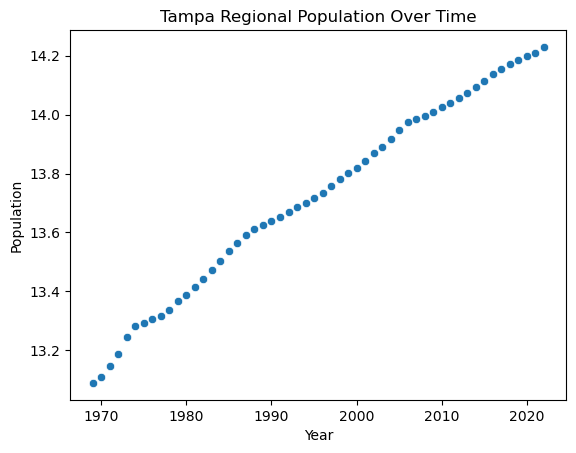

In [19]:

sns.scatterplot(x='Year',y=np.log(pop_metro.Population),data=pop_metro)
plt.set_xlabel='Population (per 100k)'
plt.title('Tampa Regional Population Over Time')
plt.show()

In [20]:
LinRegLog=LinearRegression()

In [21]:
X=pop_metro.Year.to_frame()
y=pop_metro.Population

In [23]:
LinRegLog.fit(X,y)

LinearRegression()

In [26]:
LinRegLog.score(X,y)

0.992766818417056

In [27]:
LinRegLog.coef_

array([19270.39142367])

In [ ]:
LinRegLog.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
LinRegLog.fit(X_train,y_train)

LinearRegression()

In [28]:
LinRegLog.score(X_train,y_train)

0.9923543099620151

In [29]:
LinRegLog.score(X_test,y_test)

0.9934046470995561

In [3]:
pwd

'J:\\Brainstation\\BS Git\\Tampa_Apollo_AnthropogenicIndex\\notebooks'

In [4]:
os.chdir('J:\\Brainstation\\BS Git\\Property Records\\GIS\\Zips\\')

### IMPORT ALL PROPERTY RECORDS JOIN GPS